In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

#### Idea 
- Map the #requests #avg_time based on the time of day
- Use confidence interval to check for anomalies?

In [43]:
test_data = pd.read_csv('/Users/baconbaker/Documents/Studium/ANM/anm-project/data/test_data/esb.csv')
train_data = pd.read_csv('/Users/baconbaker/Documents/Studium/ANM/anm-project/data/train_data/esb.csv')
train_data['start_time'] = train_data['startTime']
print(train_data.head())
print(test_data.head())

  serviceName      startTime  avg_time  num  succee_num  succee_rate  \
0     osb_001  1588521600000    0.5691  347         347          1.0   
1     osb_001  1588521660000    0.5813  354         354          1.0   
2     osb_001  1588521720000    0.5397  363         363          1.0   
3     osb_001  1588521780000    0.6190  387         387          1.0   
4     osb_001  1588521840000    0.4909  387         387          1.0   

      start_time  
0  1588521600000  
1  1588521660000  
2  1588521720000  
3  1588521780000  
4  1588521840000  
  service_name     start_time  avg_time  num  succee_num  succee_rate
0      osb_001  1606881600000    0.6214  361         361       1.0000
1      osb_001  1606881660000    0.5861  343         343       1.0000
2      osb_001  1606881720000    5.0125  126         122       0.9683
3      osb_001  1606881780000    9.3487   70          70       1.0000
4      osb_001  1606881840000    1.4756  375         375       1.0000


In [44]:
def get_onehot(df):
    df['start_time'] = pd.to_datetime(df['start_time'], unit='ms', origin='unix')
    df['tod'] = df["start_time"].dt.strftime("%H%M").astype('int32')
    df = df.sort_values(by='start_time')
    df = df.set_index('start_time')
    return df

In [45]:
train_data = get_onehot(train_data)
test_data = get_onehot(test_data)

In [46]:
train_data

,serviceName,startTime,avg_time,num,succee_num,succee_rate,tod
start_time,,,,,,,
2020-05-03 16:00:00,osb_001,1588521600000,0.5691,347,347,1.0,1600
2020-05-03 16:01:00,osb_001,1588521660000,0.5813,354,354,1.0,1601
2020-05-03 16:02:00,osb_001,1588521720000,0.5397,363,363,1.0,1602
2020-05-03 16:03:00,osb_001,1588521780000,0.6190,387,387,1.0,1603
2020-05-03 16:04:00,osb_001,1588521840000,0.4909,387,387,1.0,1604
...,...,...,...,...,...,...,...
2020-05-04 15:55:00,osb_001,1588607700000,0.6240,600,600,1.0,1555
2020-05-04 15:56:00,osb_001,1588607760000,0.5897,643,643,1.0,1556
2020-05-04 15:57:00,osb_001,1588607820000,0.6495,619,619,1.0,1557


In [69]:
endog = train_data['avg_time']
exog = sm.add_constant(train_data[['tod', 'num']])

rols = RollingOLS(endog, exog, window=120)
rres = rols.fit()
params = rres.params

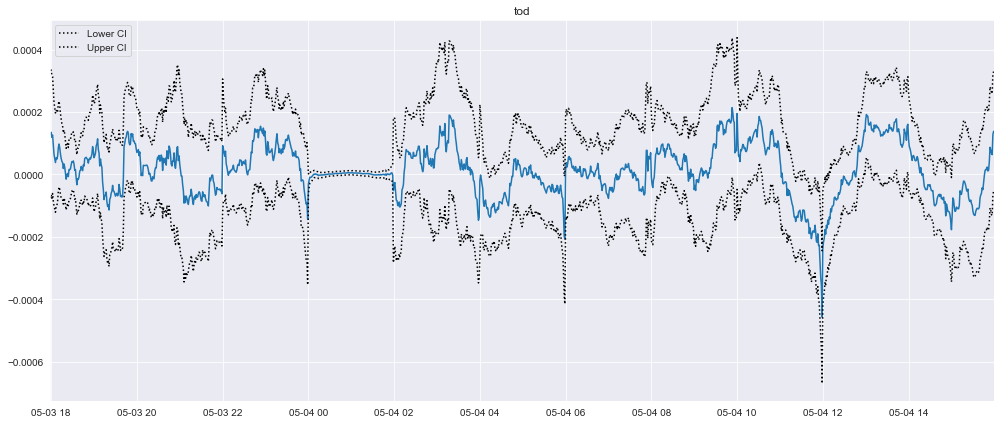

In [70]:
fig = rres.plot_recursive_coefficient(variables=['tod'], figsize=(14,6))

In [71]:
rres.predict()